# 模型预测

In [1]:
import numpy as np
import pandas as pd
from module.utils import *
from ngboost.learners import *
%config InlineBackend.figure_format='retina'

In [2]:
transform='sin+cos'
X_train, X_test, Y_train, Y_test, Y_scaler = get_data(hour_num=2, transform=transform,
                                            drop_time=True, scale=True, return_y_scaler=True)
Pred_df = Y_test

get_data(hour_num=2, transform='sin+cos', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'wind_speed-2',
       'sin(wd)-1', 'sin(wd)-2', 'cos(wd)-1', 'cos(wd)-2', 'wind_power-1',
       'wind_power-2'],
      dtype='object')


## default_linear_learner

NGBRegressor(Base=Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.3445 val_loss=0.0000 scale=0.1250 norm=0.0573
[iter 200] loss=-0.3701 val_loss=0.0000 scale=0.0312 norm=0.0140
[iter 300] loss=-0.3717 val_loss=0.0000 scale=0.0078 norm=0.0034
[iter 400] loss=-0.3718 val_loss=0.0000 scale=0.0020 norm=0.0009

Test MSE 0.036976530642298444
Test NLL -0.29826037311224973


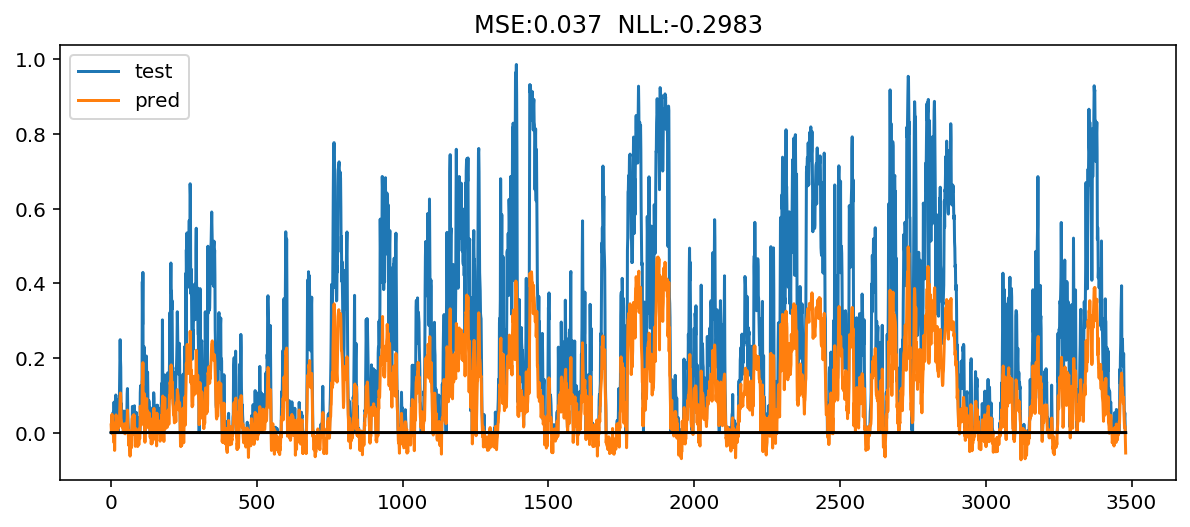

In [3]:
Y_pred = model_test(Base=default_linear_learner(alpha=0.1),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_linear_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

## default_tree_learner

NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=1000, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=200) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 200] loss=-0.3029 val_loss=0.0000 scale=0.1250 norm=0.0482
[iter 400] loss=-0.3134 val_loss=0.000

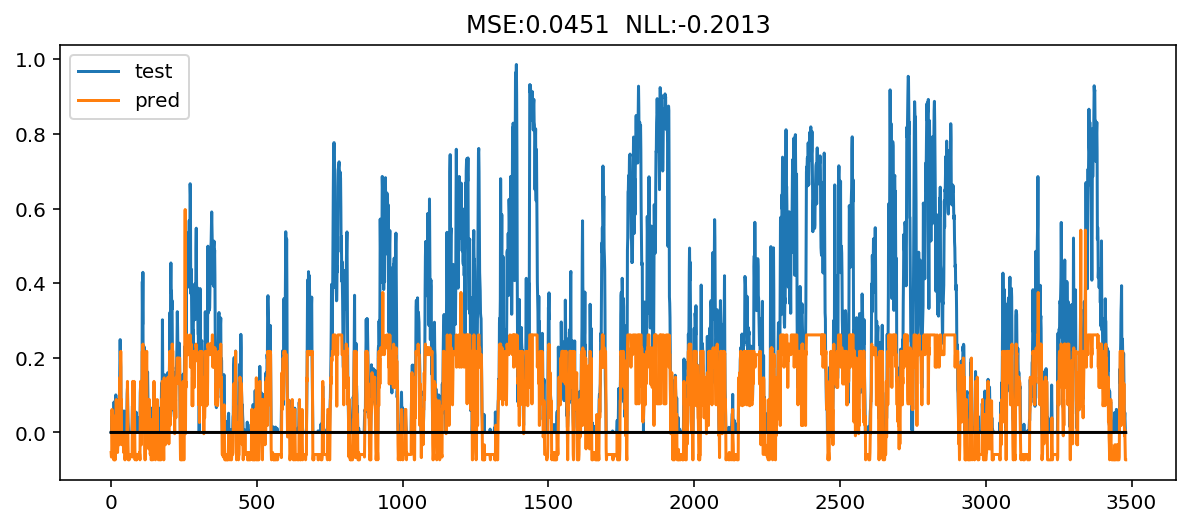

In [4]:
Y_pred = model_test(Base=default_tree_learner(depth=6),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=1000, verbose_eval=200,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_tree_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

## lasso_learner

NGBRegressor(Base=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=1000, normalize=False, positive=False,
                        precompute=False, random_state=None, selection='cyclic',
                        tol=0.0001, warm_start=False),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.0920 val_loss=0.0000 scale=0.0156 norm=0.0471
[iter 200] loss=0.0896 val_loss=0.0000 scale=0.0039 norm=0.0121
[iter 300] loss=0.0895 val_loss=0.0000 scale=0.0010 norm=0.0030
[iter 400] loss=0.0895 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.03147666587008985
Test NLL -0.3346283205221507


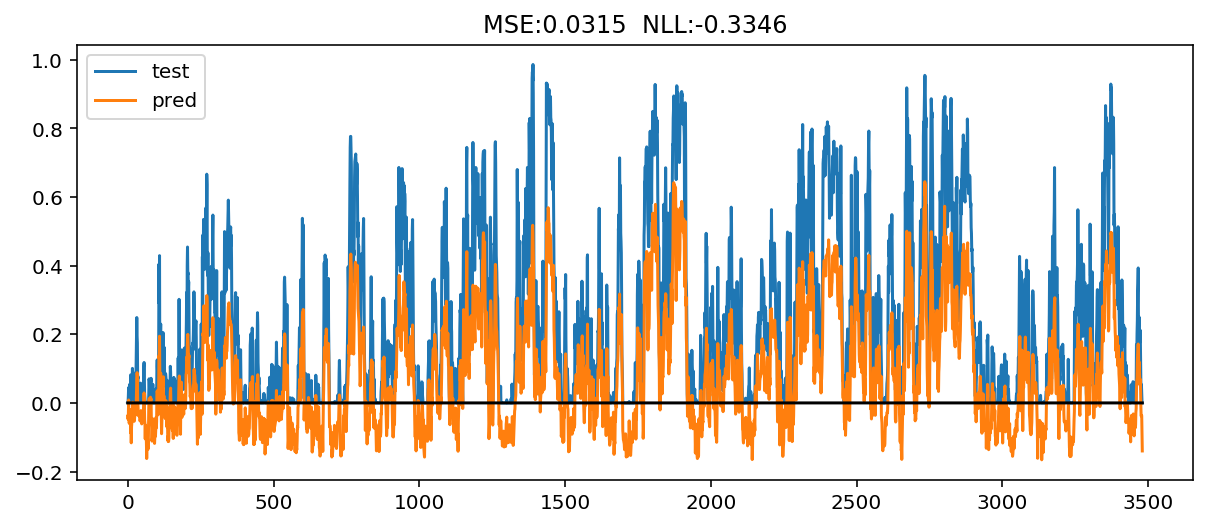

In [5]:
Y_pred = model_test(Base=lasso_learner(alpha=0.01),
           n_estimators=500, verbose_eval=100, Score=CRPS,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'lasso_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

## linear_svr_learner

NGBRegressor(Base=LinearSVR(C=0.05, dual=True, epsilon=0.0, fit_intercept=True,
                            intercept_scaling=1.0, loss='epsilon_insensitive',
                            max_iter=1000, random_state=None, tol=0.0001,
                            verbose=0),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=1.0000 norm=0.5406
[iter 100] loss=-0.2521 val_loss=0.0000 scale=0.2500 norm=0.1250
[iter 200] loss=-0.2980 val_loss=0.0000 scale=0.0625 norm=0.0299
[iter 300] loss=-0.3038 val_loss=0.0000 scale=0.0156 norm=0.0072
[iter 400] loss=-0.3042 val_loss=0.0000 scale=0.0078 norm=0.0036

Test MSE 0.023650557676016346
Test NLL -0.383163003381697


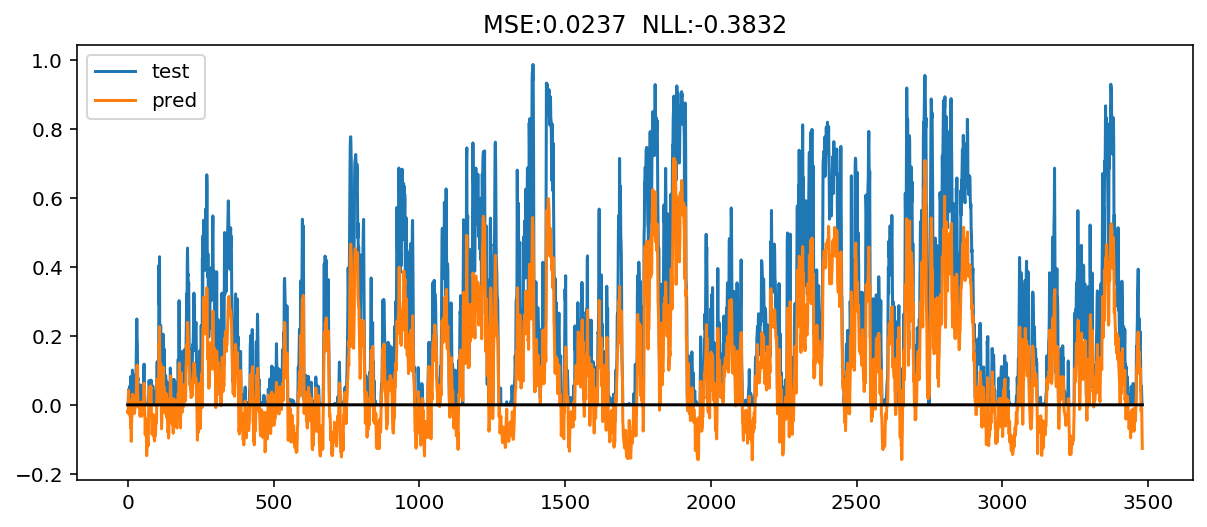

In [6]:
Y_pred = model_test(Base=linear_svr_learner(epsilon=0.0, 
                                   C=0.05, 
                                   max_iter=10000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

## kernel_ridge_learner

NGBRegressor(Base=KernelRidge(alpha=0.5, coef0=1, degree=3, gamma=None,
                              kernel='poly', kernel_params=None),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 10] loss=-0.0552 val_loss=0.0000 scale=0.5000 norm=0.2311
[iter 20] loss=-0.1180 val_loss=0.0000 scale=0.5000 norm=0.2162
[iter 30] loss=-0.1640 val_loss=0.0000 scale=0.5000 norm=0.2106
[iter 40] loss=-0.2021 val_loss=0.0000 scale=0.5000 norm=0.2094
[iter 50] loss=-0.2352 val_loss=0.0000 scale=0.5000 norm=0.2106
[iter 60] loss=-0.2533 val_loss=0.0000 scale=0.2500 norm=0.1060
[iter 70] loss=-0.2674 val_loss=0.0000 scale=0.2500 norm=0.1066
[iter 80] loss=-0.2805 val_loss=0.0000 scale=0.2500 norm=0.1072
[iter 90] loss=-0.2927 val_lo

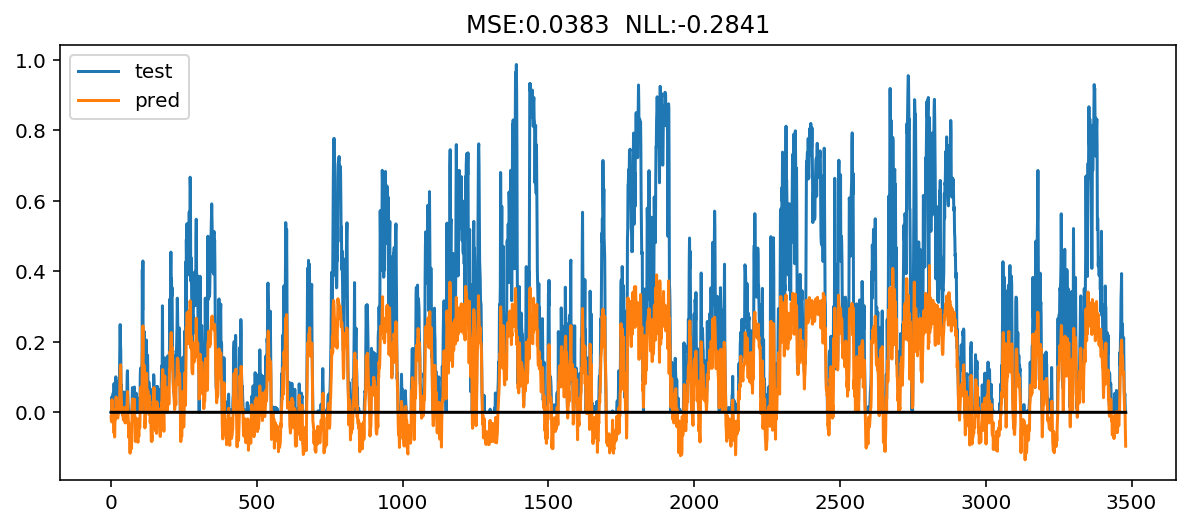

In [7]:
Y_pred = model_test(Base=kernel_ridge_learner(alpha=0.5, 
                                    kernel="poly",
                                    degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

## esn_ridge_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a1f7df2e8>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 10] loss=-0.0555 val_loss=0.0000 scale=0.5000 norm=0.2313
[iter 20] loss=-0.1191 val_loss=0.0000 scale=0.5000 norm=0.2161
[iter 30] loss=-0.1656 val_loss=0.0000 scale=0.5000 norm=0.2100
[iter 40] loss=-0.2035 val_loss=0.0000 scale=0.5000 norm=0.2081
[iter 50] loss=-0.2299 val_loss=0.0000 scale=0.2500 norm=0.1042
[iter 60] loss=-0.2450 val_loss=0.0000 scale=0.2500 norm=0.1044
[iter 70] loss=-0.2590 val_loss=0.0000 scale=0.2500 norm=0.1048
[iter 80] loss=-0.2720 val_loss=0.0000 scale=0.2500 norm=0.1051
[iter 90] loss=-0.2840 val_loss=0.0000 scale=0.2500 norm=0.1054
[iter 100] loss=-0.2

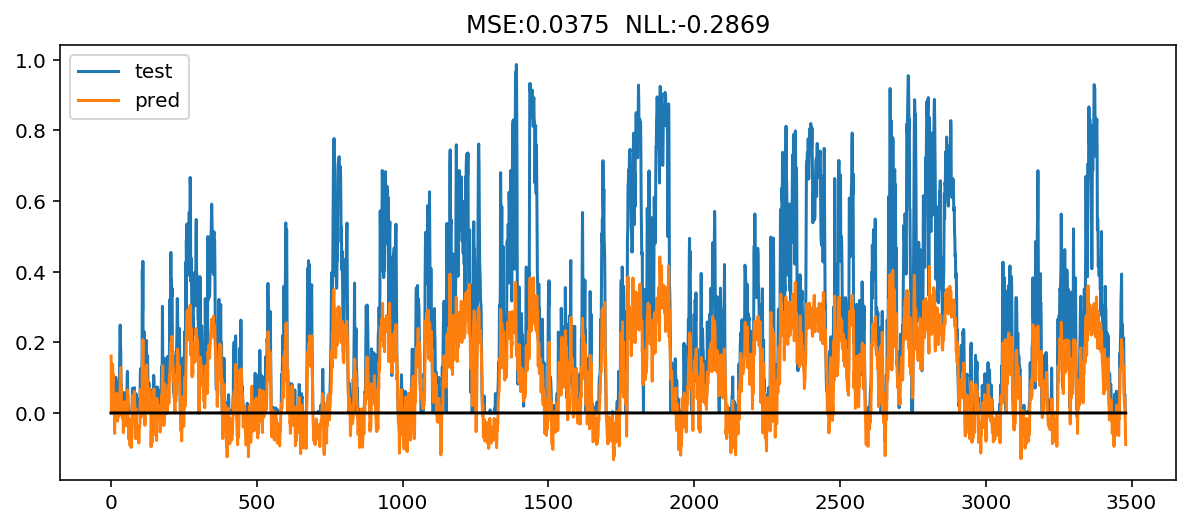

In [8]:
Y_pred = model_test(Base=esn_ridge_learner(n_readout=1000,
                                  n_components=100,
                                  alpha=0.01),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

## esn_kernel_ridge_learner

In [ ]:
Y_pred = model_test(Base=esn_kernel_ridge_learner(n_readout=1000,
                                         n_components=100,
                                         alpha=1, 
                                         kernel='poly',
                                         degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=5,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

NGBRegressor(Base=<ngboost.esn_learners.ESN_kernel_ridge_learner object at 0x108f9eac8>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=5) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 5] loss=-0.0062 val_loss=0.0000 scale=0.5000 norm=0.2491
[iter 10] loss=-0.0503 val_loss=0.0000 scale=0.5000 norm=0.2364
[iter 15] loss=-0.0856 val_loss=0.0000 scale=0.5000 norm=0.2280
[iter 20] loss=-0.1150 val_loss=0.0000 scale=0.5000 norm=0.2227
[iter 25] loss=-0.1408 val_loss=0.0000 scale=0.5000 norm=0.2194
[iter 30] loss=-0.1640 val_loss=0.0000 scale=0.5000 norm=0.2175
[iter 35] loss=-0.1851 val_loss=0.0000 scale=0.5000 norm=0.2167
[iter 40] loss=-0.2045 val_loss=0.0000 scale=0.5000 norm=0.2166
[iter 45] loss=-0.2227 val_loss=0.0000 scale=0.5000 norm=0.2170
[iter 50] loss=-

## esn_linear_svr_learner

In [ ]:
Y_pred = model_test(Base=esn_linear_svr_learner(n_readout=1000,
                                         n_components=100,
                                         epsilon=0.0,
                                         C=0.02,
                                         max_iter=1000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
pd.Series(np.zeros(len(Pred_df)), index=Pred_df.index).plot(color='k')
del Y_pred

In [ ]:
filename = 'ws+sin(wd)+cos(wd)-2.csv'
Pred_df.to_csv('/Users/apple/Documents/ML_Project/ML - 2.1/result/csv/'+filename)
Pred_df = pd.DataFrame(Y_scaler.inverse_transform(Pred_df), columns=Pred_df.columns)
Pred_df.to_csv('/Users/apple/Documents/ML_Project/ML - 2.1/result/inverse/'+filename)